<a href="https://colab.research.google.com/github/rexlindevadharshini/Yes-Bank-Stock-Closing-ice-Prediction/blob/main/Yes_Bank_Stock_closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

YES BANK is a well-known bank in the Indian financial domain; it has been in the news since 2018 due to a fraud case; we have been provided with a dataset that contains monthly stock price data for the bank since its inception, including the closing price, opening price, highest price, and lowest price of each month. The main goal is to predict the closing price of the stock for the month by developing a machine learning regression model with the highest accuracy score.

For understanding and comparing OPEN, HIGH, and LOW pricing, we have used a variety of charts. We have developed two machine learning (ML) models for price prediction. The first model employed the linear regression machine learning technique and the second model is lasso regression algorithm.

# **GitHub Link -**

https://github.com/rexlindevadharshini/Yes-Bank-Stock-Closing-ice-Prediction

# **Problem Statement**


To Predict the Future Yes Bank's Stock on the National Stock Exchange using machine learning model on linear regression.We must create a model that will assist us in predicting future stock's closing price.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


<ipython-input-4-7e563441cdc5>:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load Dataset
bank_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_YesBank_StockPrices.csv")

### Dataset First View

In [7]:
# Dataset First Look
bank_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [8]:
bank_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
bank_df.shape

(185, 5)

### Dataset Information

In [10]:
# Dataset Info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
bank_df.duplicated().sum()

0

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
bank_df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
# Visualizing the missing values

### What did you know about your dataset?

This dataset has 185 rows and 5 columns.It has month-by-month data for opening price, highest price,lowest price and closing price.
This data is available from July 2005 to November 2020.

This dataset has no missing values and  no duplicates.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
print(bank_df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


In [14]:
# Dataset Describe
bank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

1. Date : Date of record
2. Open : Opening price in the day
3. High : Highest price in the day
4. Low : Lowest price in the day
5. Close : Closing price in the day

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
bank_df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
Feature = bank_df.loc[:, ['Open', 'High', 'Low']]
Target = bank_df['Close']

In [17]:
# converting date- datatype
bank_df['Date']=pd.to_datetime(bank_df['Date'], format='%b-%y')

In [18]:
bank_df['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [19]:
# set date column as index
bank_df.set_index('Date',inplace=True)

In [20]:
bank_df

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15


### What all manipulations have you done and insights you found?

The "Date" column is converted to a datetime type using the format "%b-%y."
And sets the "Date" column as the dataframe's index.

The date format We entered the date in mm-yy format, which was then converted to the proper format of yyyy-mm-dd, and the date column has dtype as an object, converting it into date-time format.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

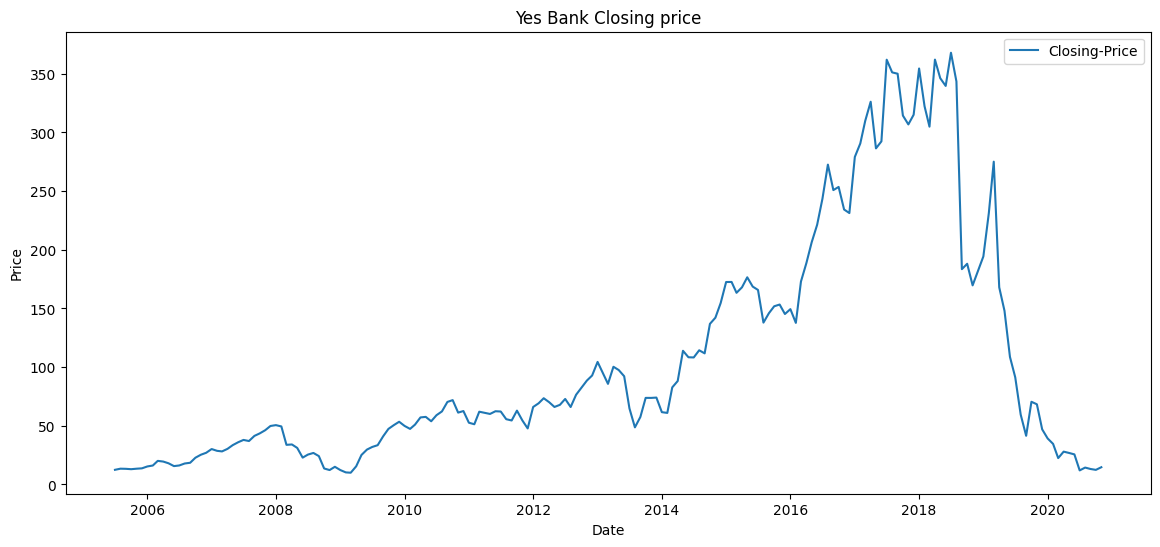

In [21]:
# Chart - 1 visualization code
plt.figure(figsize=(14,6))
plt.plot(bank_df['Close'])
plt.legend(['Closing-Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Yes Bank Closing price')
plt.show()

##### 1. Why did you pick the specific chart?

To know the closing price over year.

##### 2. What is/are the insight(s) found from the chart?

There was a good price increase from July 2005 to 2018 and that there was an uptrend, making it an excellent opportunity to invest. Around July 2005, the price ranged between 5 and 10 rupees, and by 2018, it had risen to a peak of more than 350 rupees.

After the Rana Kapoor scandal, which occurred in 2018, the stock price started to decline and there was a sharp downward trend; in or near 2020, the price returned to its level of roughly 5 to 10 rupees per share from July 2005.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.This is evident from the upward trend in the stock price from July 2005 to 2018—a period that was profitable for investors—and the subsequent downward trend in the market price

#### Chart - 2

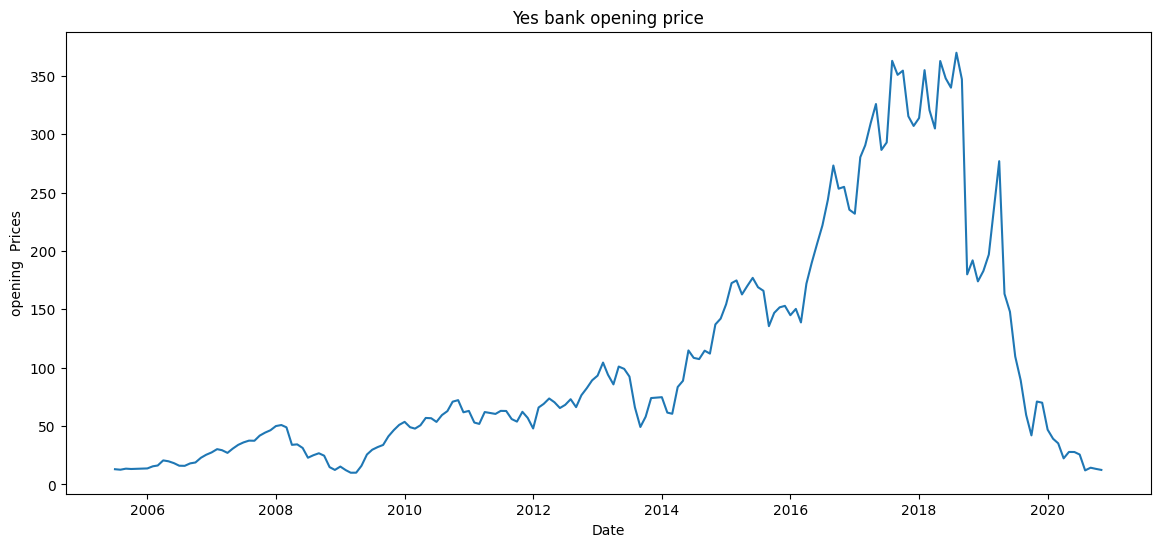

In [22]:
# Chart - 2 visualization code
plt.figure(figsize=(14,6))
plt.xlabel('Date')
plt.ylabel('opening  Prices')
plt.plot(bank_df['Open'])
plt.title('Yes bank opening price')
plt.show()


##### 1. Why did you pick the specific chart?

To know the opening price over year.

##### 2. What is/are the insight(s) found from the chart?

It shows that Yes Bank's opening price and closing price have the same result. The opening price began to rise in 2014 and reached a high in 2018. However, it began to fall steadily after 2018, eventually reaching zero in 2020, the same year as Yes Bank's closing price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

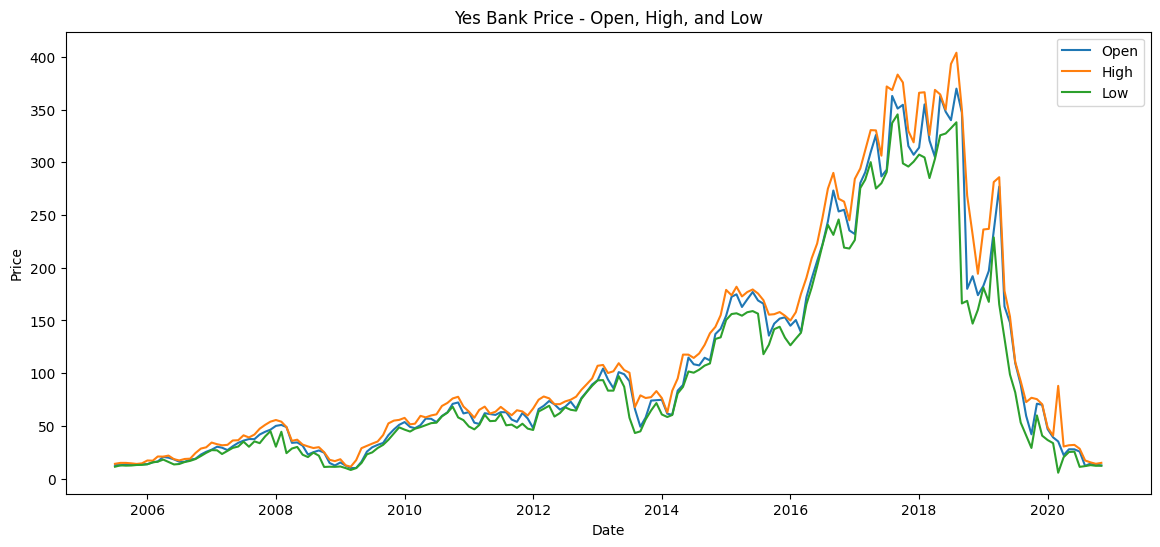

In [23]:
# Chart - 3 visualization code
plt.figure(figsize=(14,6))
plt.plot(bank_df['Open'], label='Open')
plt.plot(bank_df['High'], label='High')
plt.plot(bank_df['Low'], label='Low')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Yes Bank Price - Open, High, and Low')
plt.show()

##### 1. Why did you pick the specific chart?

To see our independent variables' open, high, and low prices from July 2005 to November 2020.

##### 2. What is/are the insight(s) found from the chart?

We can see from the above chart that there was a good price increase from July 2005 to 2018 and that there was an uptrend, making it an excellent opportunity to invest. Around July 2005, the price ranged between 5 and 10 rupees, and by 2018, it had risen to a peak of more than 350 rupees.

Following the Rana Kapoor scandal in 2018, the stock price started to decline and experienced a sharp decline; in approximately 2020, it returned to its July 2005 level of between 5 and 10 rupees.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help in creating a positive business impact, as we can see from the uptrend in the stock price from July 2005 to 2018, which was a beneficial time for investors, and the downtrend in the stock price after the Rana Kapoor fraud.

#### Chart - 4

Text(0.5, 1.0, '')

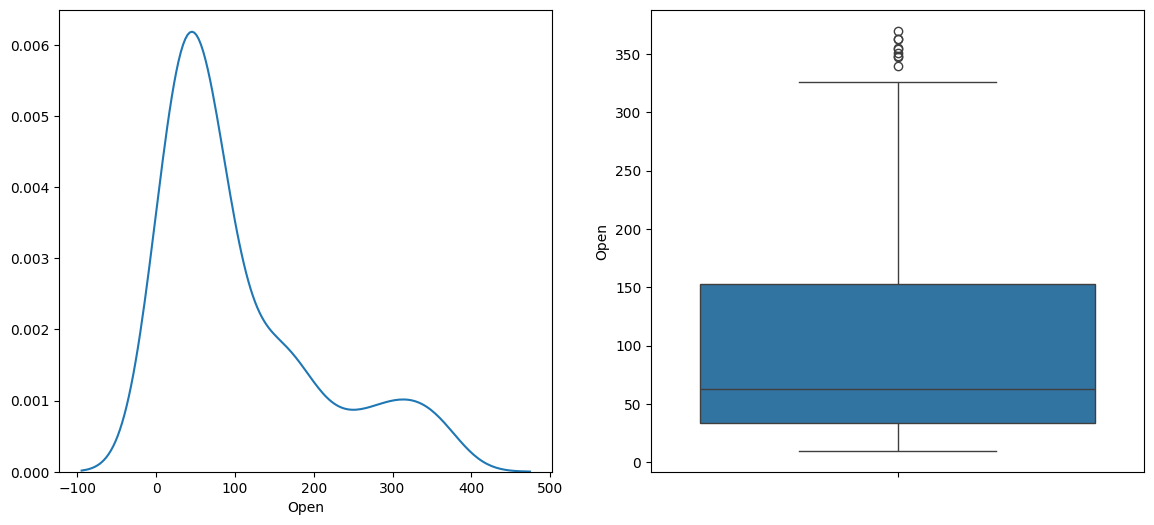

In [24]:
# Chart - 4 visualization code
plt.figure(figsize=(14,6))

ax1 = plt.subplot(1, 2, 1)
sns.kdeplot(bank_df['Open'], ax=ax1)
ax1.set_ylabel('')
ax1.set_xlabel('Open')

ax2 = plt.subplot(1, 2, 2)
sns.boxplot(bank_df['Open'], ax=ax2)
ax2.set_title('')

##### 1. Why did you pick the specific chart?

To see the density visualisation of the opening price and Visualizing outliers.

##### 2. What is/are the insight(s) found from the chart?

By understanding the density chart we can say that opening price was mostly in the range of 40Rs to 150Rs with the peak at around 60Rs The outliers are around 350Rs price range

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

we can say that the stock in was around 40Rs to 150Rs most of the time and this could have been a good time to invest and was in 350Rs just a few times, so selling the stock at 350Rs range can be a good idea.

#### Chart - 5

<Axes: xlabel='Low', ylabel='Density'>

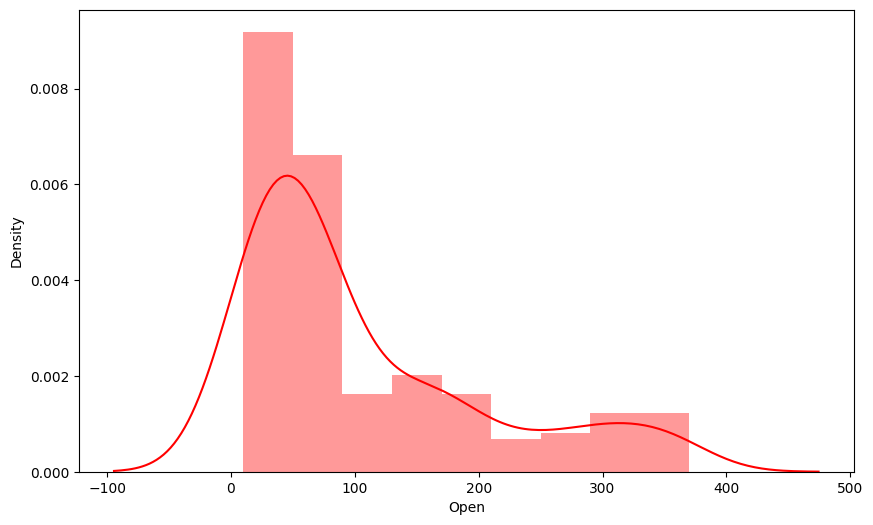

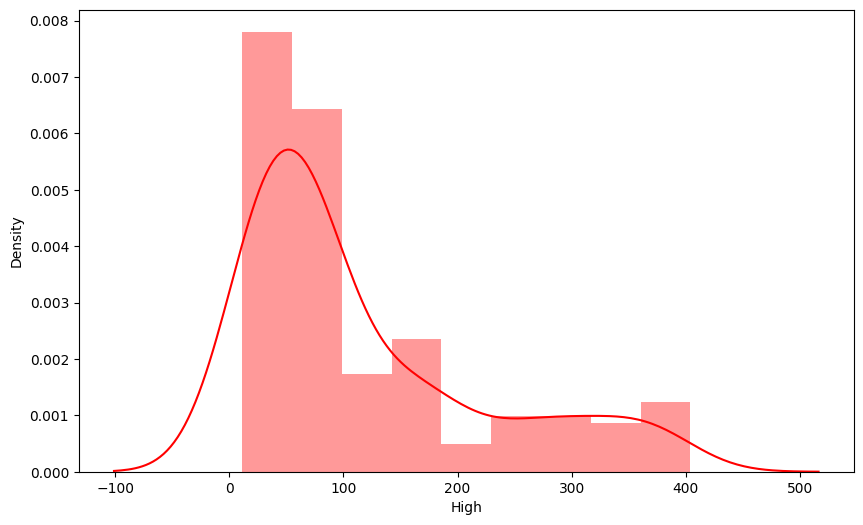

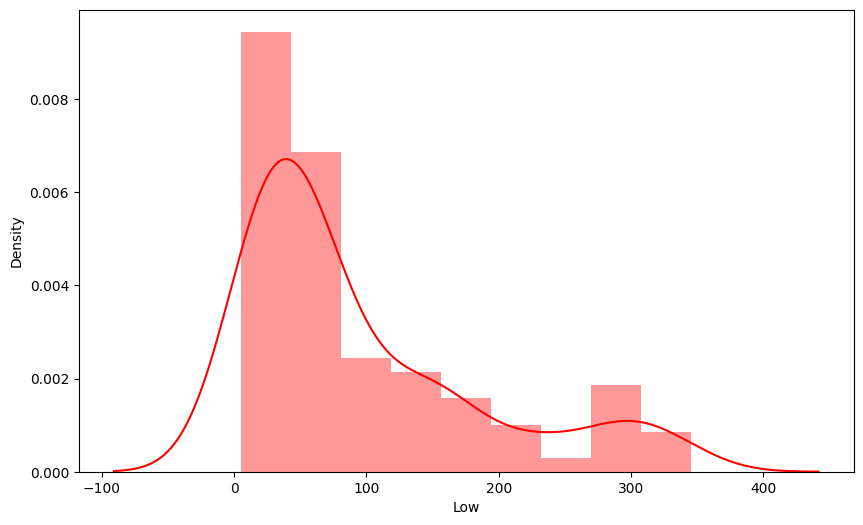

In [25]:
# Chart - 5 visualization code
plt.figure(figsize=(10,6))
sns.distplot(bank_df['Open'], color='red')

plt.figure(figsize=(10,6))
sns.distplot(bank_df['High'], color='red')

plt.figure(figsize=(10,6))
sns.distplot(bank_df['Low'], color='red')

##### 1. Why did you pick the specific chart?

To understand the density distribution visualisation of the month's Open, Close, lowest price.

##### 2. What is/are the insight(s) found from the chart?

We can say that the density of YES BANK stock low prices is greatest between 5Rs and 60Rs, and it gradually decreases after 100Rs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by understanding the density of open, high, low price of YES BANK stock price we can say that the chances of stock price closing between 5Rs to 60Rs is high and the chances of stock price closing higher than 100Rs is less.

#### Chart - 6

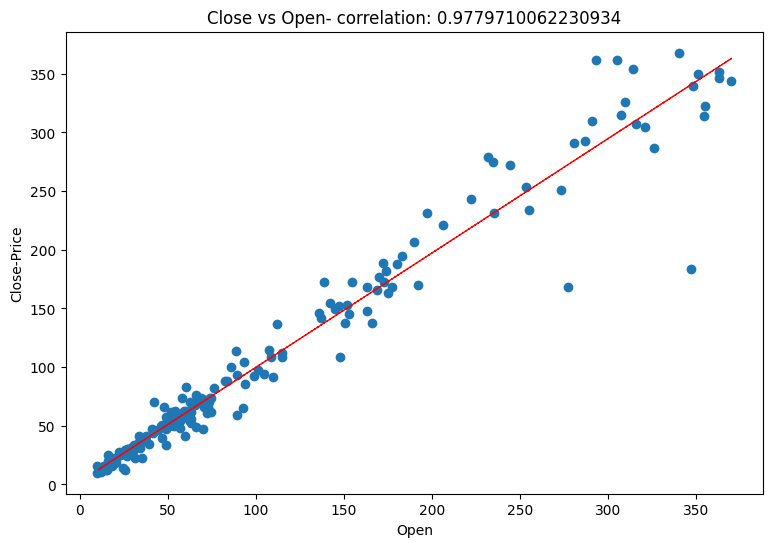

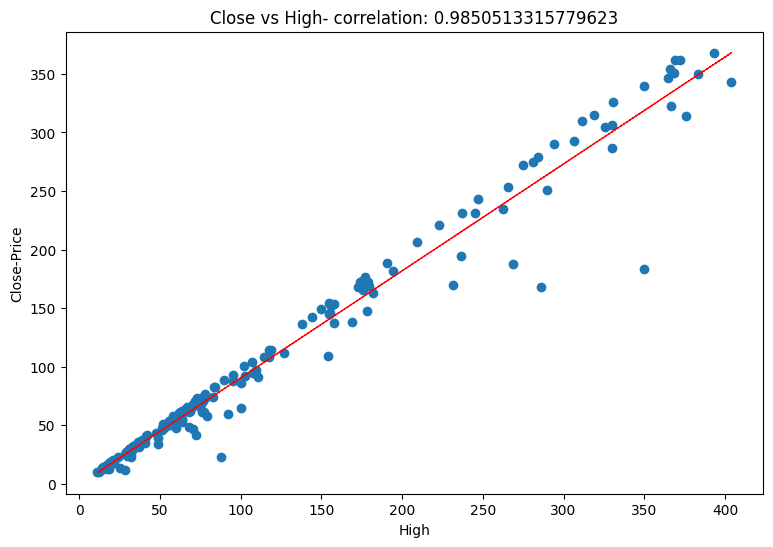

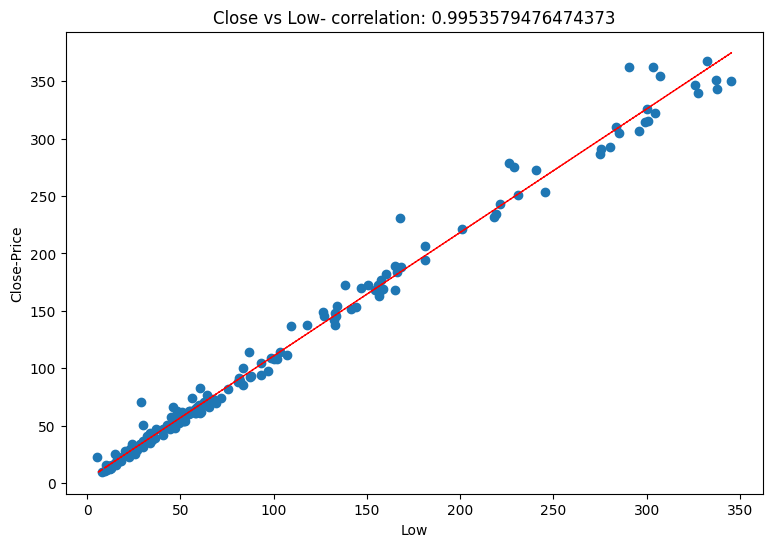

In [26]:
# Chart - 6 visualization code
#scatter plot between dependent variable with all independent variables.
for col in Feature[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bank_df[col]
    label = bank_df['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close-Price')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(bank_df[col], bank_df['Close'], 1)
    y_hat = np.poly1d(z)(bank_df[col])

    plt.plot(bank_df[col], y_hat, "r--", lw=1)

plt.show()


##### 1. Why did you pick the specific chart?

To understand the correlation between Close price and Open price, Close price and High price, Close price and Low price

##### 2. What is/are the insight(s) found from the chart?

All three graphs show a positive relationship. The correlation between the Close-Open chart is 0.9779. The correlation between the Close-High chart is 0.9850. The correlation for the Close-Low chart is 0.9953. When compared to the opening price, the chances of the stock closing at a low are greater.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

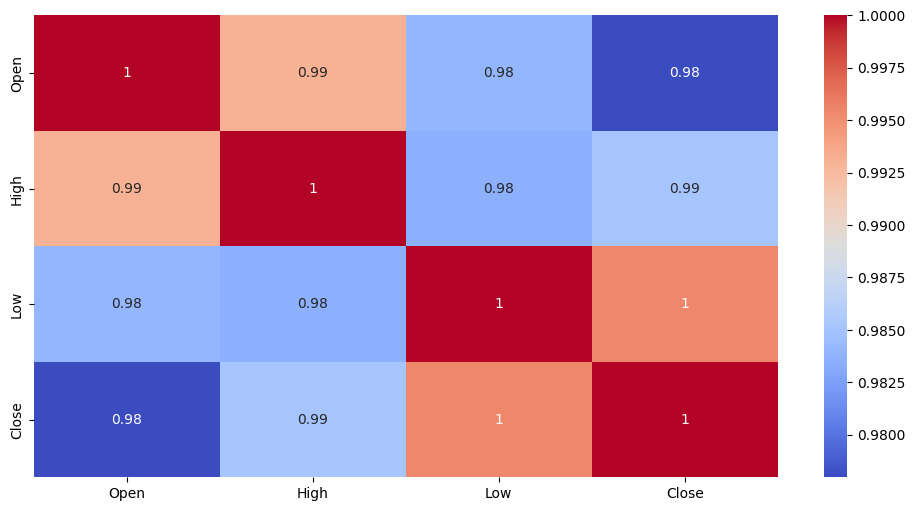

In [27]:
# Correlation Heatmap visualization code
corr=bank_df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot = True, cmap='coolwarm')


##### 1. Why did you pick the specific chart?

To know the price relationship between Close, Open, High, and Low.

##### 2. What is/are the insight(s) found from the chart?

It shows that the relationship between low and close is the strongest, followed by high and close, and open and close has some close relationship.

#### Chart - 15 - Pair Plot

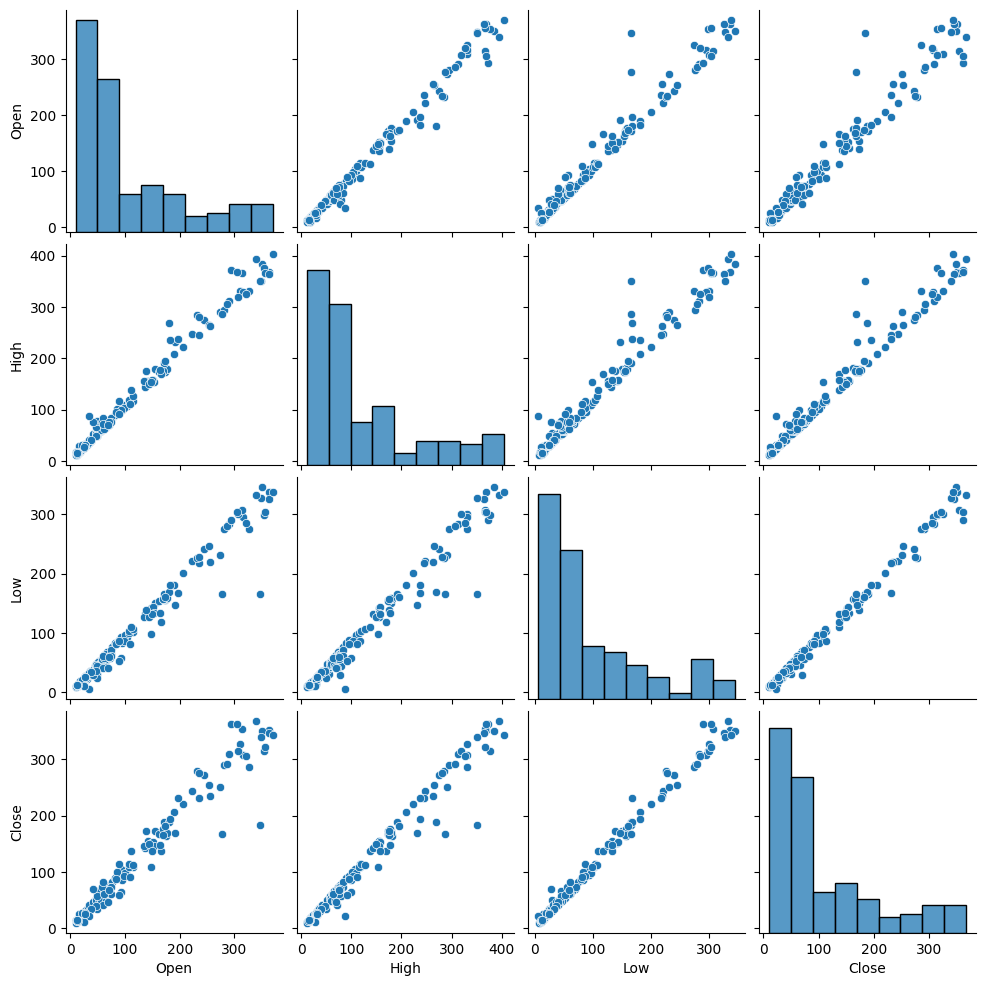

In [28]:
# Pair Plot visualization code
sns.pairplot(bank_df)

##### 1. Why did you pick the specific chart?

To visualise pairwise relationships between variables in a dataset. This creates a nice visualisation and aids in data comprehension by condensing a large amount of data into a single figure.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
#VIF score (Variance Inflation Factor method)

def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [ ]:
calc_vif(Feature)

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


##### What all feature selection methods have you used  and why?

Variance Inflation Factor method. VIF is used to detect the degree of multicollinearity among the features in the linear regression model.

##### Which all features you found important and why?

Even though we have high VIF scores, we will not perform feature engineering because each feature is essential for this particular use case. In practice, most indicators use all of these characteristics to forecast future values.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes,because the data is moderately right skewed.So,we will use log transformation for normal distribution.

In [29]:
# Transform Your data
#Using Log transformation
independent_var = ['Open','High','Low']
x = np.log10(bank_df[independent_var])


In [30]:
y = np.log10(bank_df['Close'])

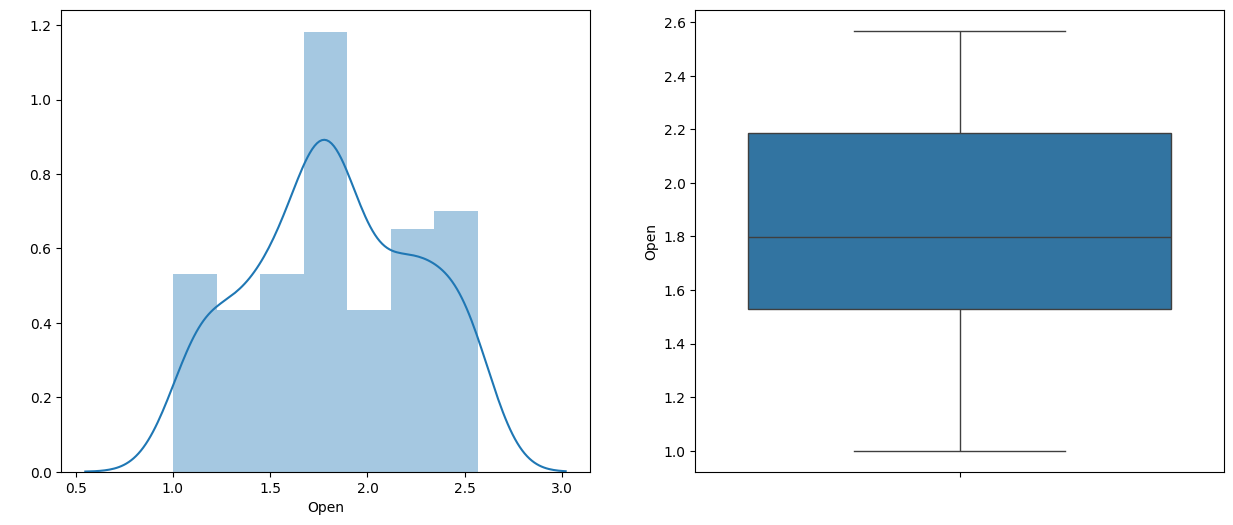

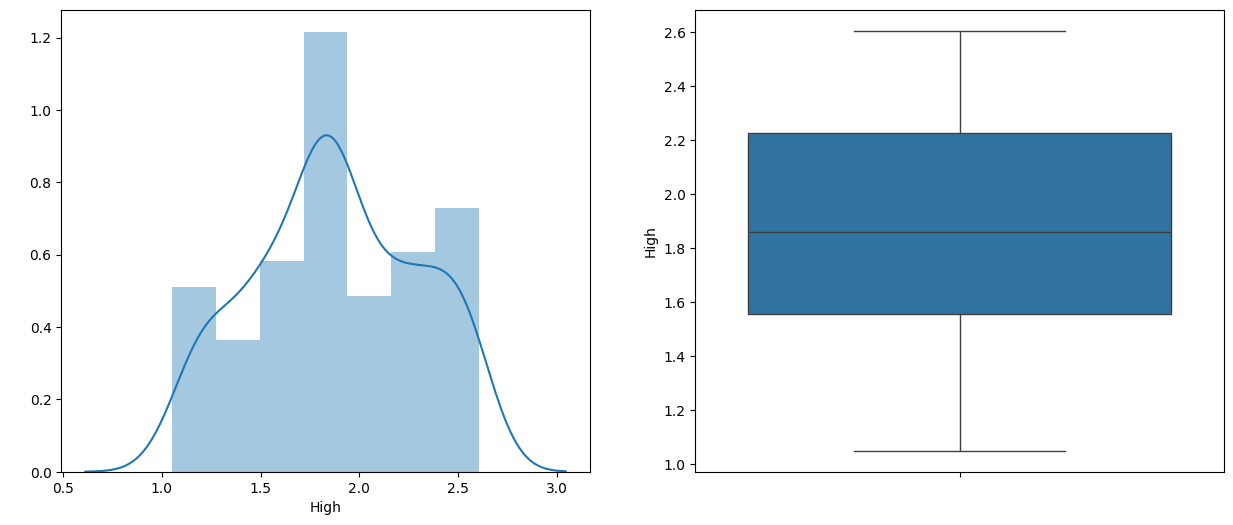

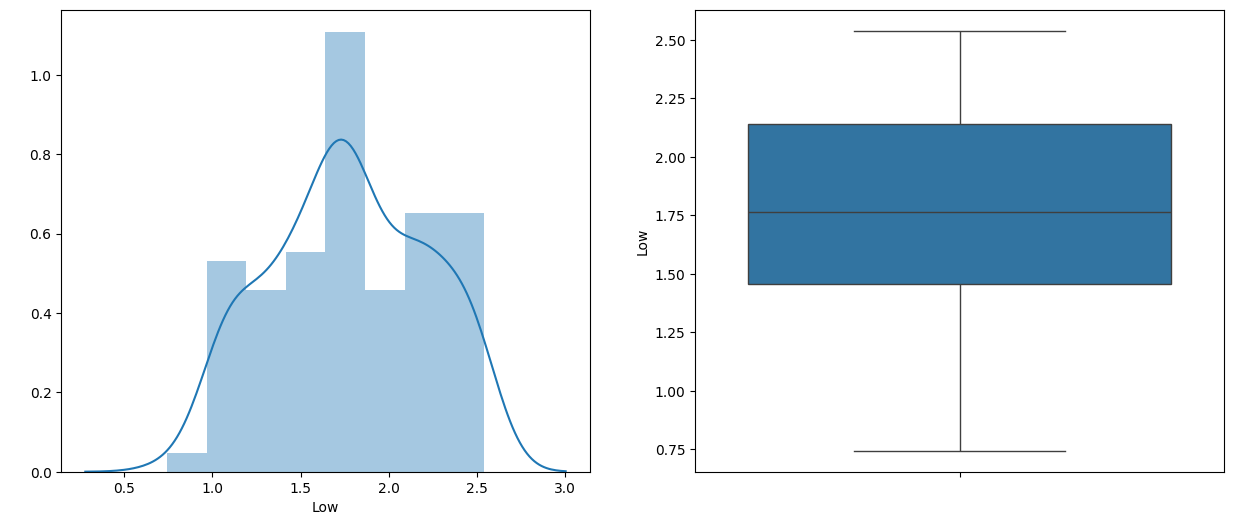

In [31]:
# visualize
for var in Feature:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(bank_df[var]))
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(bank_df[var]))
    fig.set_title('')
    fig.set_ylabel(var)


### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [34]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


##### What data splitting ratio have you used and why?

We used Train test split. A split of 80-20 % is done on Train and Test respectively, beacuse its considered to be optimum split.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 - Linear Regression

In [35]:
# ML Model - 1 Implementation
# Create a Linear Regression Object
reg = LinearRegression()

# Fit the Linear Regression Model to the training data
reg.fit(X_train, y_train)

# Evaluate the performance of the model using R^2 score on the training data
r2_score = reg.score(X_train, y_train)
print(r2_score)

0.9947900553430551


In [36]:
reg.coef_

array([-0.54870728,  0.82607147,  0.72696515])

In [37]:
y_pred = reg.predict(X_test)

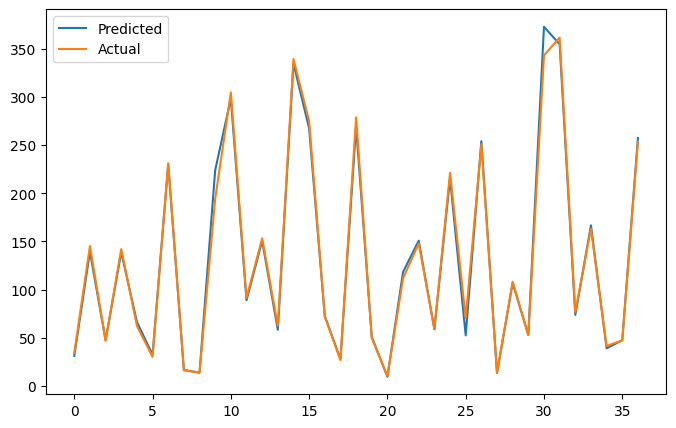

In [38]:
# visualize
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [39]:
# Visualizing evaluation Metric Score chart
# Calculating performance metrices
from sklearn.metrics import r2_score
MSE = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**y_test, 10**y_pred)
print("R2 :" ,r2)

adj_r2 = 1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", adj_r2)


MSE : 70.4204061614549
RMSE : 8.391686729225235
R2 : 0.9937436908107393
Adjusted R2 :  0.9931749354298974


#### 2. Cross- Validation & Hyperparameter Tuning

In [40]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 -  Lasso Regression

In [41]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [42]:
lasso.score(X_train, y_train)

0.6790589204250228

In [44]:
y_pred_1 = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [45]:
# Visualizing evaluation Metric Score chart
mse = mean_squared_error(y_test, y_pred_1)
print("MSE :", mse)

rmse = math.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_test, y_pred_1)
print("MAE :", mae)

r2 = r2_score(y_test, y_pred_1)
print("R2 :", r2)

MSE : 0.06791265432425676
RMSE : 0.2606005647044088
MAE : 0.22004984010599196
R2 : 0.6354315886987754


#### 2. Cross- Validation & Hyperparameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

lasso_1 = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)



GridSearchCV(cv=3, estimator=Lasso(alpha=0.1, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [48]:
print("The value for best-fit alpha is found to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)


The value for best-fit alpha is found to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.001303609483074943


In [49]:
y_pred_lasso = lasso_regressor.predict(X_test)

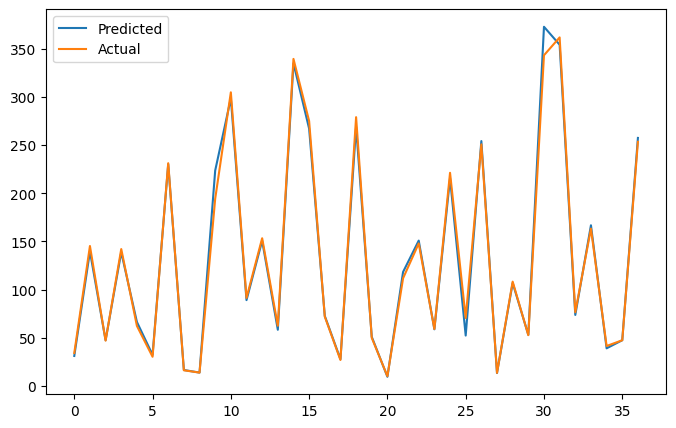

In [50]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

For higher accuracy on test data and to prevent the model lasso from becoming overfit, we used cross validation and hyper parameter adjustment.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Not much improvement is seen because of the less accuracy than our first model.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We choose our first model,Linear Regression for final predication.Because it has higher accuracy than lasso,have the lowest mean squared error, and have high evalution metrics scores.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We start with data wrangling, then move on to data cleaning and transformation, and finally to modelling.

In the EDA section, we conclude from our dataset that: the stock's closing price decreased after the year 2018, primarily due to the Rana Kapoor case, which severely impacted the stock price. The graph for Yes BANK's opening and closing prices shows the same result. The point is that the YES BANK stock price falls after 2018, making it unwise for investors to invest their money. We can conclude from the scatter plot that bivariate analysis shows a high correlation of close price with other features. The histogram plots show that they are all right skewed.We used Log Transformation to transform the data because it was moderately skewed to the right. We can conclude from the heatmap that all of the features have a high correlation with one another. We used linear regression, and our linear regression model is 99.78% accurate.

The performance of our linear regression model is then visualised, and the graph shows that we achieve the nearly best fit model for our dataset.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***